<a href="https://colab.research.google.com/github/Asif-PA/Zomato-Analysis-Case-Study/blob/main/Analysis_On_Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Import libraries that you required and Load the data set.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Zomoto.csv')


In [ ]:
df.head()

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
1,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
2,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7/5,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
3,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4 /5,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
4,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NEW,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,[],[],Dine-out,JP Nagar


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   10000 non-null  int64 
 1   url                          10000 non-null  object
 2   address                      10000 non-null  object
 3   name                         10000 non-null  object
 4   online_order                 10000 non-null  object
 5   book_table                   10000 non-null  object
 6   rate                         8528 non-null   object
 7   votes                        10000 non-null  int64 
 8   phone                        9764 non-null   object
 9   location                     9997 non-null   object
 10  rest_type                    9953 non-null   object
 11  dish_liked                   4642 non-null   object
 12  cuisines                     9995 non-null   object
 13  approx_cost(for two people)  994

In [ ]:
df.shape

(10000, 18)

In [ ]:
df.columns

Index(['Unnamed: 0', 'url', 'address', 'name', 'online_order', 'book_table',
       'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked',
       'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

**2.Which are the top restaurant chains based on the distribution(frequency) in Bangaluru?**

In [ ]:
#  Count the frequency of each restaurant chain
restaurant_counts = df['name'].value_counts().reset_index()
restaurant_counts.columns = ['Restaurant Name', 'Frequency']
#filtering the top10
top_restaurants = restaurant_counts.head(10)
top_restaurants

,Restaurant Name,Frequency
0,Cafe Coffee Day,18
1,Keventers,17
2,Onesta,17
3,McDonald's,16
4,SGS Non Veg - Gundu Pulav,16
5,The Chocolate Heaven,16
6,Baskin Robbins,16
7,Mad Over Donuts,15
8,Tata Cha,15
9,Petoo,15


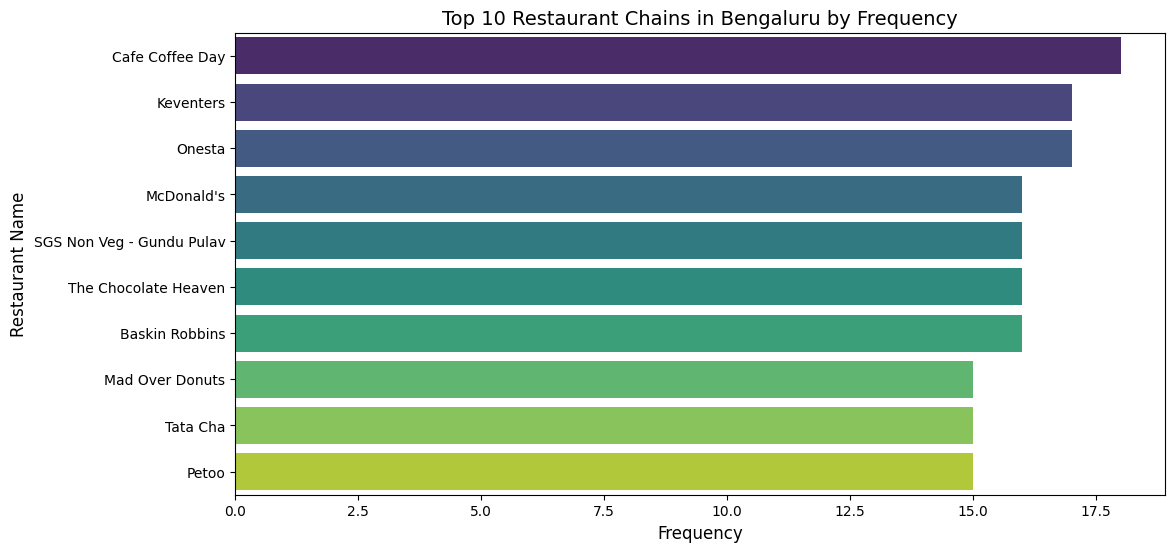

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Restaurant Name', data=top_restaurants, palette='viridis')
plt.title('Top 10 Restaurant Chains in Bengaluru by Frequency', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)
plt.show()

**3.How many restaurants do not accept online orders?**

In [ ]:
# Filtering for restaurants that do not accept online orders
restaurants_no_onlineorder = df[df['online_order'] == 'No']
no_online_restaurents = restaurants_no_onlineorder.shape[0]
no_online_restaurents

4057

**4.What is the ratio b/w restaurants that provide and do not provide table booking?**

In [ ]:
provide_table_booking = df[df['book_table'] == 'Yes'].shape[0]
no_table_booking = df[df['book_table'] == 'No'].shape[0]
ratio = provide_table_booking / no_table_booking
ratio

0.14233493260223898

**5.Use a boxplot on the rating column. Use User Defined Function or Lambda function or Apply function to extract the data that comes before /. Kindly exclude /.**

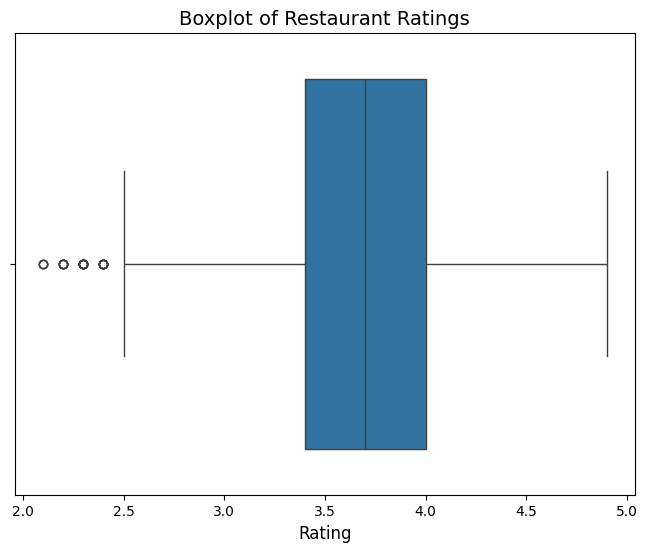

In [ ]:
# Extracting numerical rating before '/'
df['cleaned_rating'] = df['rate'].apply(lambda x: str(x).split('/')[0] if isinstance(x, str) else x)
# Convert the extracted ratings to numeric
df['cleaned_rating'] = pd.to_numeric(df['cleaned_rating'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['cleaned_rating'])
plt.title('Boxplot of Restaurant Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.show()

**6.Online and Offline orders restaurants percentage.**

In [ ]:
online_order_counts = df['online_order'].value_counts()
online_percentage = (online_order_counts['Yes'] / len(df)) * 100
offline_percentage = (online_order_counts['No'] / len(df)) * 100
print(f"Percentage of restaurants accepting online orders: {online_percentage:.2f}%")
print(f"Percentage of restaurants not accepting online orders: {offline_percentage:.2f}%")

Percentage of restaurants accepting online orders: 59.43%
Percentage of restaurants not accepting online orders: 40.57%


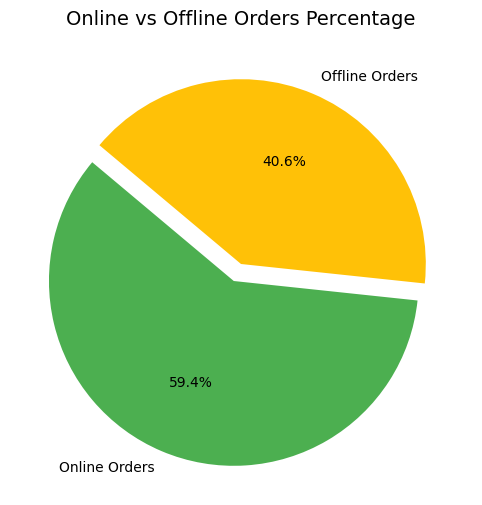

In [ ]:
#Visualizing using pie plot
labels = ['Online Orders', 'Offline Orders']
sizes = [online_percentage, offline_percentage]
colors = ['#4CAF50', '#FFC107']
explode = (0.1, 0)  # Explode the first slice (online orders)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Online vs Offline Orders Percentage', fontsize=14)
plt.show()


**7.Plot the scatter plot using the Cost vs rating variable with respect to online order. Use apply the function Or other function to remove the “,”.**

In [ ]:
df.head()

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),cleaned_rating
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City,3.2
1,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road,3.6
2,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7/5,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR,3.7
3,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4 /5,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield,3.4
4,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NEW,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,[],[],Dine-out,JP Nagar,NaN


In [ ]:
#cleaning the 'cost' column
df['cleaned_cost'] = df['approx_cost(for two people)'].apply(lambda x: str(x).replace(',', '') if isinstance(x, str) else x)
df['cleaned_cost'] = pd.to_numeric(df['cleaned_cost'], errors='coerce')
# cleaning 'rate' column
df['cleaned_rating'] = df['rate'].apply(lambda x: str(x).split('/')[0] if isinstance(x, str) else x)
df['cleaned_rating'] = pd.to_numeric(df['cleaned_rating'], errors='coerce')
# dropping null
filtered_df = df.dropna(subset=['cleaned_cost', 'cleaned_rating'])



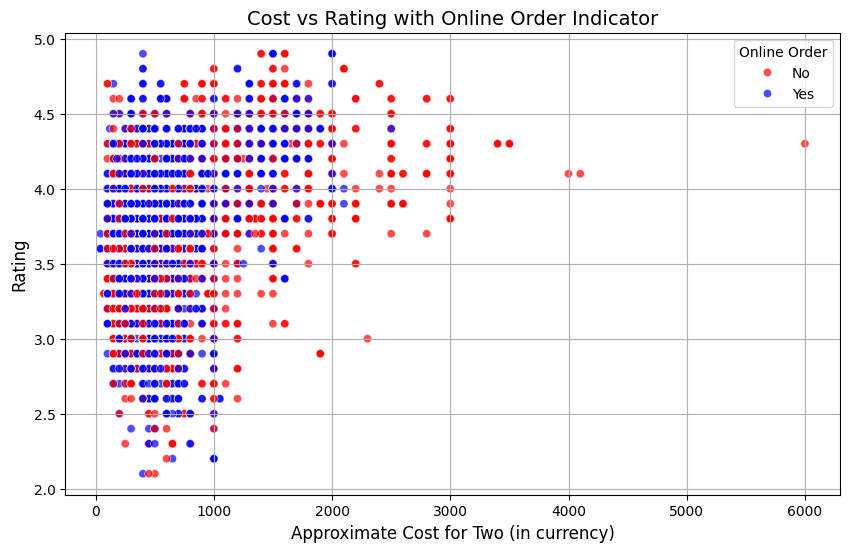

In [ ]:
#visuaizing using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_df,
    x='cleaned_cost',
    y='cleaned_rating',
    hue='online_order',
    palette={'Yes': 'blue', 'No': 'red'},
    alpha=0.7)

plt.title('Cost vs Rating with Online Order Indicator', fontsize=14)
plt.xlabel('Approximate Cost for Two (in currency)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.legend(title='Online Order')
plt.grid(True)
plt.show()

**8.Find the distribution of the votes and Approx_cost using a user-defined function and for a loop.**

In [ ]:
def calculate_distribution(data, column, bins):
    distribution = {f"{bins[i]}-{bins[i+1]}": 0 for i in range(len(bins) - 1)}
    for value in data[column].dropna():
        for i in range(len(bins) - 1):
            if bins[i] <= value < bins[i + 1]:
                distribution[f"{bins[i]}-{bins[i+1]}"] += 1
                break
    return distribution

In [ ]:
vote_bins = [0, 100, 500, 1000, 5000, 10000, 20000]
cost_bins = [0, 100, 500, 1000, 2000, 5000]
vote_distribution = calculate_distribution(df, 'votes', vote_bins)
cost_distribution = calculate_distribution(df, 'cleaned_cost', cost_bins)

# Print results
print("Votes Distribution:")
print(vote_distribution)
print("\nApprox Cost Distribution:")
print(cost_distribution)

Votes Distribution:
{'0-100': 6347, '100-500': 2286, '500-1000': 659, '1000-5000': 657, '5000-10000': 45, '10000-20000': 6}

Approx Cost Distribution:
{'0-100': 7, '100-500': 5460, '500-1000': 3119, '1000-2000': 1170, '2000-5000': 184}


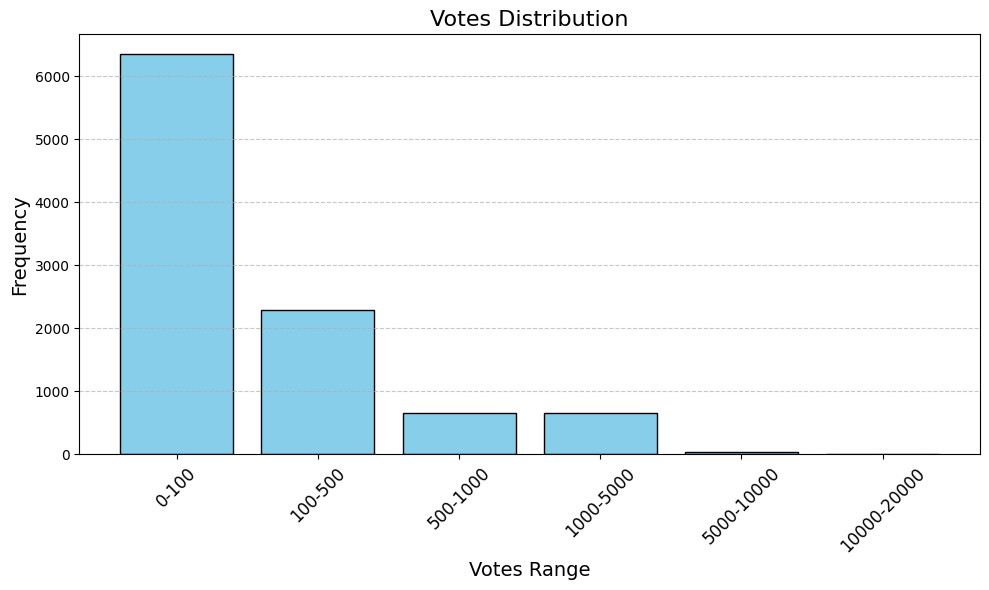

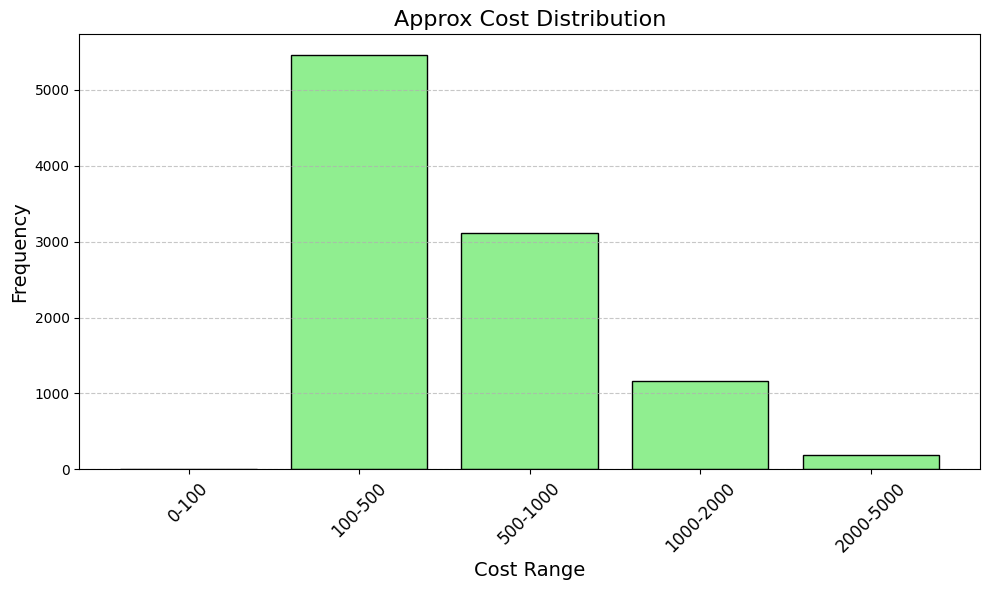

In [ ]:
#visualizing the above
# Votes Distribution
plt.figure(figsize=(10, 6))
plt.bar(vote_distribution.keys(), vote_distribution.values(), color='skyblue', edgecolor='black')
plt.title("Votes Distribution", fontsize=16)
plt.xlabel("Votes Range", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Approx Cost Distribution
plt.figure(figsize=(10, 6))
plt.bar(cost_distribution.keys(), cost_distribution.values(), color='lightgreen', edgecolor='black')
plt.title("Approx Cost Distribution", fontsize=16)
plt.xlabel("Cost Range", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**9.Which are the most common restaurant type in Banglore?**

In [ ]:
# frequency of resturent types
restaurant_type_counts = df['rest_type'].value_counts()
print("Most Common Restaurant Types in Bangalore:")
print(restaurant_type_counts.head(10))


Most Common Restaurant Types in Bangalore:
rest_type
Quick Bites           3625
Casual Dining         2018
Cafe                   712
Delivery               499
Dessert Parlor         443
Takeaway, Delivery     442
Bakery                 228
Casual Dining, Bar     205
Beverage Shop          150
Bar                    134
Name: count, dtype: int64


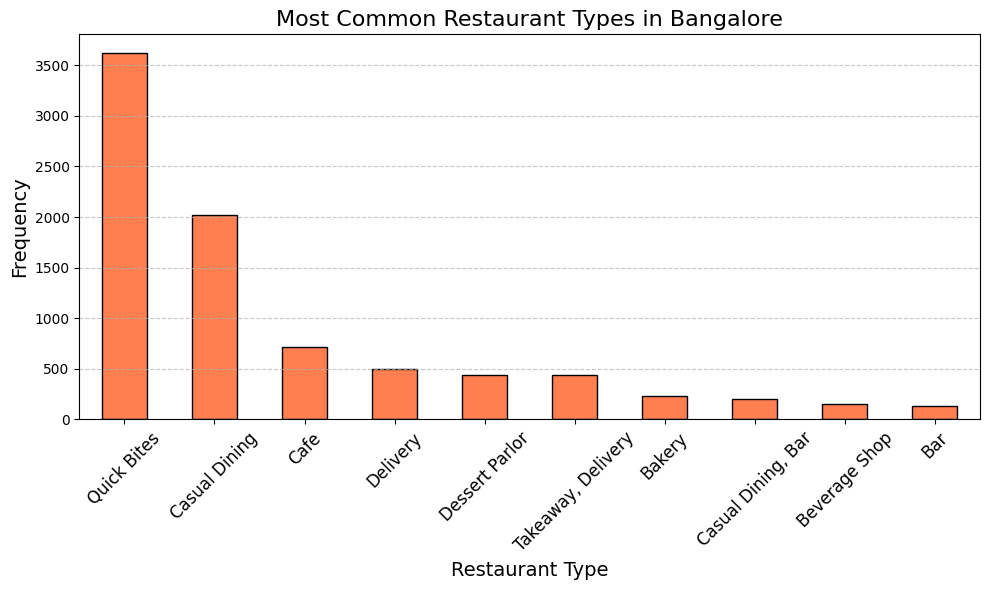

In [ ]:
# Visualizing the top restaurant types
plt.figure(figsize=(10, 6))
restaurant_type_counts.head(10).plot(kind='bar', color='coral', edgecolor='black')
plt.title("Most Common Restaurant Types in Bangalore", fontsize=16)
plt.xlabel("Restaurant Type", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**10.Is there any difference b/w the votes of restaurants accepting and not accepting online orders?**

In [ ]:
# Calculating average votes for restaurants accepting and not accepting online orders
votes_comparison = df.groupby('online_order')['votes'].mean()
print("Average Votes Comparison:")
print(votes_comparison)

Average Votes Comparison:
online_order
No     278.146907
Yes    302.117449
Name: votes, dtype: float64


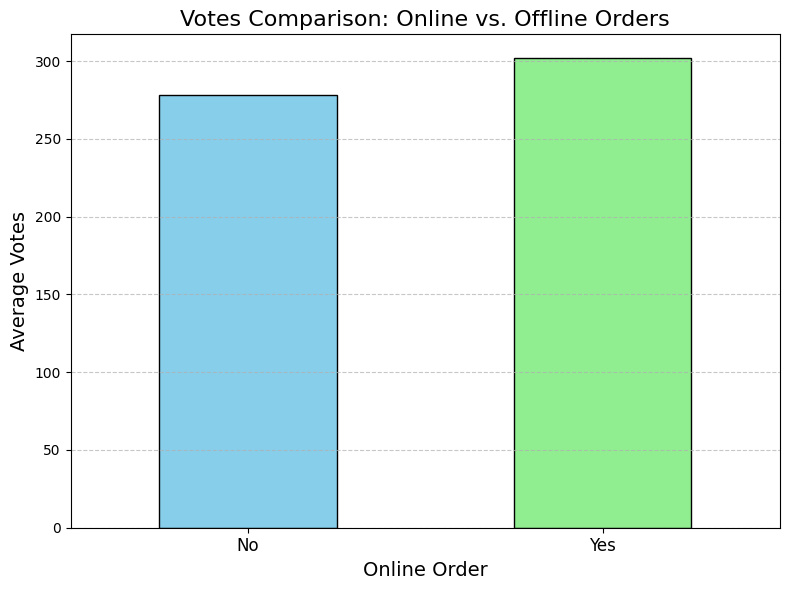

In [ ]:
# Visualizing the comparison
plt.figure(figsize=(8, 6))
votes_comparison.plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title("Votes Comparison: Online vs. Offline Orders", fontsize=16)
plt.xlabel("Online Order", fontsize=14)
plt.ylabel("Average Votes", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**12.Find the Best budget Restaurants in any location.**

In [ ]:
location = input("Enter the location: ")
# Filtering restaurants in the selected location
location_data = df[df['location'] == location]
# Cleaning 'approx_cost(for two people)'
location_data['approx_cost(for two people)'] = location_data['approx_cost(for two people)'].str.replace(",", "").astype(float)
# Find the cheapest restaurant
min_cost = location_data['approx_cost(for two people)'].min()
best_budget_restaurants = location_data[location_data['approx_cost(for two people)'] == min_cost]
print(f"Best Budget Restaurants in {location}:")
print(best_budget_restaurants[['name', 'location', 'approx_cost(for two people)']])


Enter the location: Electronic City
Best Budget Restaurants in Electronic City:
                 name         location  approx_cost(for two people)
4532    A-1 Fast Food  Electronic City                        100.0
7953  Royal Chowpatty  Electronic City                        100.0
8398     Mumbai Kulfi  Electronic City                        100.0


**13.Top quick bites restaurant chains in Banglore.**

In [ ]:
# Filtering for 'Quick Bites'
quick_bites = df[df['rest_type'].str.contains("Quick Bites", na=False)]
top_quick_bites = quick_bites['name'].value_counts().head(10)
print("Top Quick Bites Restaurant Chains in Bangalore:")
print(top_quick_bites)



Top Quick Bites Restaurant Chains in Bangalore:
name
McDonald's                   16
KFC                          15
SGS Non Veg - Gundu Pulav    15
Taco Bell                    13
Just Shawarma                12
Pizza Stop                   12
Pathaan Sir                  12
Ambur Hot Dum Biryani        11
Donne Biriyani Mane          11
Cravy Wings                  10
Name: count, dtype: int64


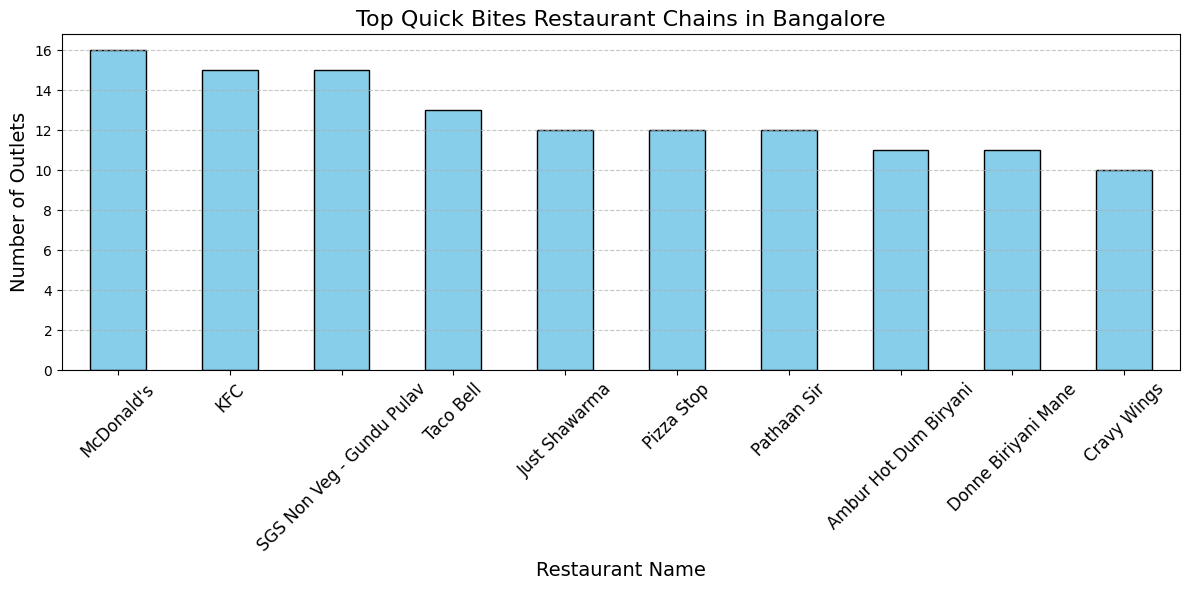

In [ ]:
# Visualizating
plt.figure(figsize=(12, 6))
top_quick_bites.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top Quick Bites Restaurant Chains in Bangalore", fontsize=16)
plt.xlabel("Restaurant Name", fontsize=14)
plt.ylabel("Number of Outlets", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**14.Which are the most popular casual dining restaurant chains, Make use of any plot related to this question?**

In [ ]:
df.head()

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),cleaned_rating,cleaned_cost
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City,3.2,500.0
1,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road,3.6,1700.0
2,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7/5,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR,3.7,600.0
3,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4 /5,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield,3.4,400.0
4,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NEW,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,[],[],Dine-out,JP Nagar,NaN,400.0


In [ ]:
# Filtering for 'Casual Dining' in the 'rest_type' column
casual_dining = df[df['rest_type'].str.contains("Casual Dining", na=False)]
top_casual_dining = casual_dining['name'].value_counts().head(10)
print("Top Casual Dining Restaurant Chains in Bangalore:")
print(top_casual_dining)


Top Casual Dining Restaurant Chains in Bangalore:
name
Onesta                       17
Thalassery Restaurant        11
San Churro Cafe              11
Oye Amritsar                 10
Toscano                      10
A2B - Adyar Ananda Bhavan     9
Savoury Restaurant            9
Wangs Kitchen                 9
Empire Restaurant             9
Mainland China                8
Name: count, dtype: int64


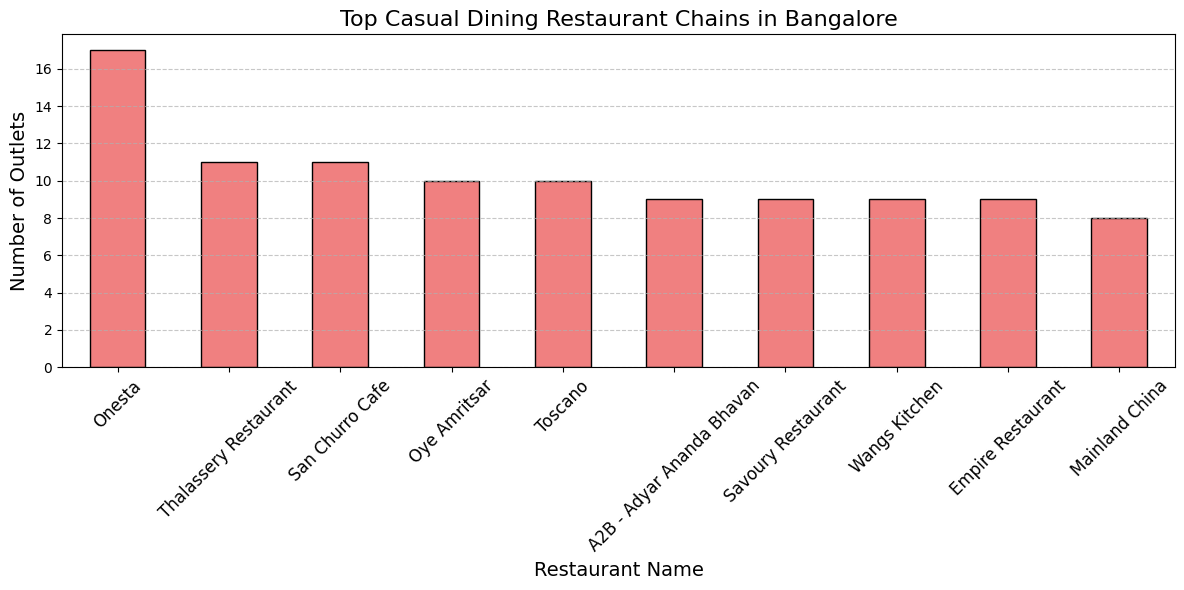

In [ ]:
# Visualizating
plt.figure(figsize=(12, 6))
top_casual_dining.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Top Casual Dining Restaurant Chains in Bangalore", fontsize=16)
plt.xlabel("Restaurant Name", fontsize=14)
plt.ylabel("Number of Outlets", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**15.Which are the most popular cuisines of Bangalore using a related plot?**

In [ ]:
# Spliting the 'cuisines' column
cuisines_split = df['cuisines'].str.split(',').explode().str.strip()
top_cuisines = cuisines_split.value_counts().head(10)
print("Top Cuisines in Bangalore:")
print(top_cuisines)



Top Cuisines in Bangalore:
cuisines
North Indian    4054
Chinese         3056
South Indian    1640
Fast Food       1559
Biryani         1263
Desserts        1122
Continental     1103
Cafe            1057
Beverages        926
Italian          674
Name: count, dtype: int64


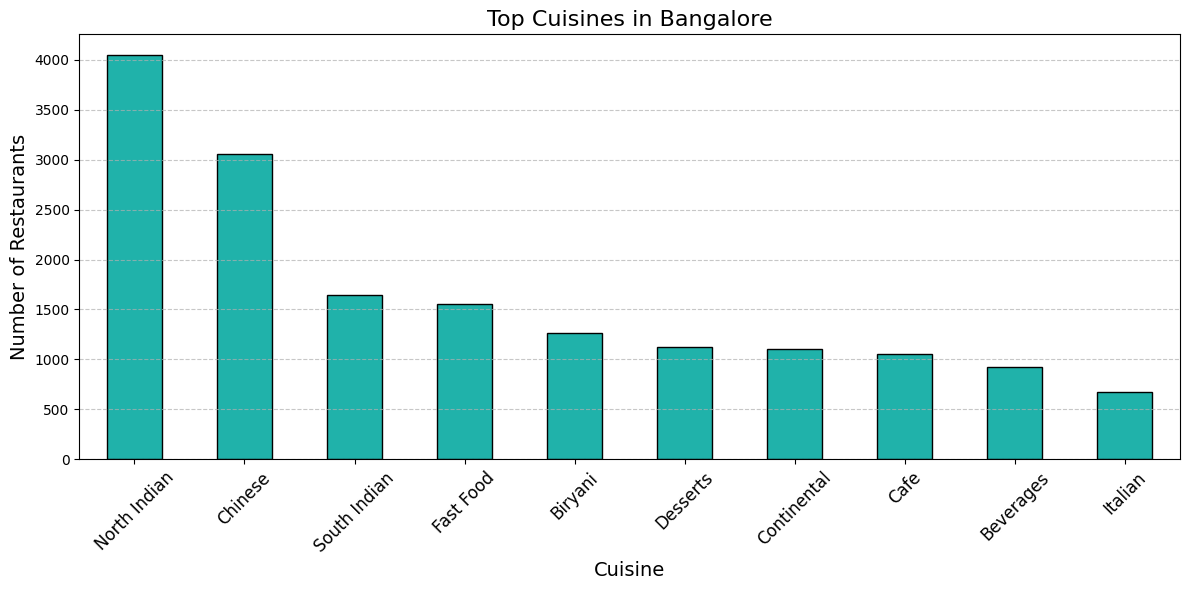

In [ ]:
# Visualizing
plt.figure(figsize=(12, 6))
top_cuisines.plot(kind='bar', color='lightseagreen', edgecolor='black')
plt.title("Top Cuisines in Bangalore", fontsize=16)
plt.xlabel("Cuisine", fontsize=14)
plt.ylabel("Number of Restaurants", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
